In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
invasive_path = '/Users/xutian/Documents/Dev/dartmouth/research/mimic4-analyze/data/invasive-ventilation'


In [3]:
train_ = 'train/listfile.csv'
test_ = 'test/listfile.csv'

invasive_train_path = os.path.join(invasive_path, train_)
invasive_test_path = os.path.join(invasive_path, test_)
print(invasive_train_path)
print(invasive_test_path)

/Users/xutian/Documents/Dev/dartmouth/research/mimic4-analyze/data/invasive-ventilation/train/listfile.csv
/Users/xutian/Documents/Dev/dartmouth/research/mimic4-analyze/data/invasive-ventilation/test/listfile.csv


In [4]:
all_patients = set()

def get_patients(file):
    data = pd.read_csv(file).values
    patients = set()
    for i in range(data.shape[0]):
        patient_Id = data[i][0].split("_")[0]
        patients.add(patient_Id)
        
    return patients

patient_train = get_patients(invasive_train_path)

all_patients.update(patient_train)

patient_test = get_patients(invasive_test_path)
all_patients.update(patient_test)
print(len(all_patients))


974


In [5]:
root_path = '/Users/xutian/Documents/Dev/dartmouth/research/mimic4-analyze/data/root'
root_train = os.path.join(root_path, 'train')
root_test = os.path.join(root_path,'test')

print(root_train)
print(root_test)

/Users/xutian/Documents/Dev/dartmouth/research/mimic4-analyze/data/root/train
/Users/xutian/Documents/Dev/dartmouth/research/mimic4-analyze/data/root/test


In [6]:
root_train_patients = []

for folder in os.listdir(root_train):
    root_train_patients.append(folder)
    
root_test_patients = []
for folder in os.listdir(root_test):
    root_test_patients.append(folder)
    


In [7]:
# for patient in all_patients:
#     print(patient)
print(len(all_patients))

974


In [8]:
iv_patients_in_root_train = []
iv_patients_in_root_test = []

for p in all_patients:
    if p in root_train_patients:
        iv_patients_in_root_train.append(p)
    if p in root_test_patients:
        iv_patients_in_root_test.append(p)
        
print(len(iv_patients_in_root_train))
print(len(iv_patients_in_root_test))

781
193


In [9]:
'''
{
    "subject_id": {
        "age": 90,
        "ethnicity"： “write”,
        "gender": "m", 
        "mortality_inunit": 0,
        "mortality": 0,
        "mortality_inhospital": 0    
    }
}
'''



def collect_info(iv_patients_in_root, split = 'train'):
    root_path = ''
    if split == 'train':
        root_path = root_train
    else:
        root_path = root_test
        
    patients_stats = {}
    for p in iv_patients_in_root:
        p_path = os.path.join(root_path, p, 'stays.csv')    
        if not os.path.exists(p_path):
            continue

        p_ts = pd.read_csv(p_path)

        subject_id = p_ts.subject_id.values[-1]
        age = p_ts.age.values[-1]
        ethnicity = p_ts.ethnicity.values[-1]
        gender = p_ts.gender.values[-1]
        mortality_inunit = p_ts.mortality_inunit.values[-1]
        mortality = p_ts.mortality.values[-1]
        mortality_inhospital = p_ts.mortality_inhospital.values[-1]

        if patients_stats.get(subject_id) is None:
            patients_stats[subject_id] = {}
        patients_stats[subject_id]['age'] = age
        patients_stats[subject_id]['ethnicity'] = ethnicity.lower()
        patients_stats[subject_id]['gender'] = gender.lower()
        patients_stats[subject_id]['mortality_inunit'] = mortality_inunit
        patients_stats[subject_id]['mortality'] = mortality
        patients_stats[subject_id]['mortality_inhospital'] = mortality_inhospital
    
    return patients_stats
    
all_patient_statistics = {}
all_patient_statistics.update(collect_info(iv_patients_in_root_train, split='train'))
all_patient_statistics.update(collect_info(iv_patients_in_root_test, split='test'))

print(all_patient_statistics)
    

{19502124: {'age': 82, 'ethnicity': 'white', 'gender': 'm', 'mortality_inunit': 0, 'mortality': 0, 'mortality_inhospital': 0}, 18078191: {'age': 20, 'ethnicity': 'white', 'gender': 'm', 'mortality_inunit': 0, 'mortality': 0, 'mortality_inhospital': 0}, 10229323: {'age': 52, 'ethnicity': 'white', 'gender': 'f', 'mortality_inunit': 0, 'mortality': 0, 'mortality_inhospital': 0}, 10812824: {'age': 31, 'ethnicity': 'unknown', 'gender': 'm', 'mortality_inunit': 0, 'mortality': 0, 'mortality_inhospital': 0}, 11234565: {'age': 52, 'ethnicity': 'other', 'gender': 'm', 'mortality_inunit': 0, 'mortality': 0, 'mortality_inhospital': 0}, 15640315: {'age': 42, 'ethnicity': 'other', 'gender': 'f', 'mortality_inunit': 0, 'mortality': 0, 'mortality_inhospital': 0}, 11917664: {'age': 83, 'ethnicity': 'white', 'gender': 'm', 'mortality_inunit': 0, 'mortality': 0, 'mortality_inhospital': 0}, 16922461: {'age': 35, 'ethnicity': 'unknown', 'gender': 'm', 'mortality_inunit': 0, 'mortality': 0, 'mortality_inho

In [10]:
age_distribution = [0] * 11
# [0-10, 11-20, 21-30, 31-40, 31-50, 51-60, 61-70, 71-80, 81-90, 91-100, > 100]

age_distribution = {
    '0-10': 0,
    '11-20': 0,
    '21-30': 0,
    '31-40': 0,
    '41-50': 0,
    '51-60': 0,
    '61-70': 0,
    '71-80': 0,
    '81-90': 0,
    '91-100': 0,
    '>100': 0
}
ethnicity_distribution = {
    'black/african american': 0,
    'other': 0,
    'asian': 0,
    'unknow': 0,
    'american indian/alaska native': 0,
    'unable to obtain': 0,
    'hispanic/latino': 0, 
    'white': 0
}

gender_distribution = {
    'f': 0,
    'm': 0
}


age_distribution_detail = {
    '0-10': [],
    '11-20': [],
    '21-30': [],
    '31-40': [],
    '41-50': [],
    '51-60': [],
    '61-70': [],
    '71-80': [],
    '81-90': [],
    '91-100': [],
    '>100': []
}
ethnicity_distribution_detail = {
    'black/african american': [],
    'other': [],
    'asian': [],
    'unknown': [],
    'american indian/alaska native': [],
    'unable to obtain': [],
    'hispanic/latino': [], 
    'white': []
}

gender_distribution_detail = {
    'f': [],
    'm': []
}


age_unique = set()
ethnicity_unique = set()
gender_unique = set()

patient_mortality_map = {}


In [11]:
for id, value in all_patient_statistics.items():
    age_unique.add(value['age'])
    ethnicity_unique.add(value['ethnicity'])
    gender_unique.add(value['gender'])
    ethnicity = value['ethnicity']
    gender = value['gender']
    
    in_hospital_mortality = value['mortality_inhospital']
    
    if patient_mortality_map.get(id) is None:
        patient_mortality_map[id] = 0
    patient_mortality_map[id] = in_hospital_mortality
    # handle age
    age = value['age']
    if age <= 10:
        age_distribution_detail['0-10'].append(id)
    elif age <= 20:
        age_distribution_detail['11-20'].append(id)
    elif age <= 30:
        age_distribution_detail['21-30'].append(id)
    elif age <= 40:
        age_distribution_detail['31-40'].append(id)
    elif age <= 50:
        age_distribution_detail['41-50'].append(id)
    elif age <= 60:
        age_distribution_detail['51-60'].append(id)
    elif age <= 70:
        age_distribution_detail['61-70'].append(id)
    elif age <= 80:
        age_distribution_detail['71-80'].append(id)
    elif age <= 90:
        age_distribution_detail['81-90'].append(id)
    elif age <= 100:
        age_distribution_detail['91-100'].append(id)
    else:
        age_distribution_detail['>100'].append(id)
        
    # handle ethnicity
    if ethnicity == 'black/african american':
        ethnicity_distribution_detail['black/african american'].append(id)
    elif ethnicity == 'other':
        ethnicity_distribution_detail['other'].append(id)
    elif ethnicity == 'asian':
        ethnicity_distribution_detail['asian'].append(id)
    elif ethnicity == 'unknown':
        ethnicity_distribution_detail['unknown'].append(id)
    elif ethnicity == 'american indian/alaska native':
        ethnicity_distribution_detail['american indian/alaska native'].append(id)
    elif ethnicity == 'hispanic/latino':
        ethnicity_distribution_detail['hispanic/latino'].append(id)
    elif ethnicity == 'white':
        ethnicity_distribution_detail['white'].append(id)
    elif ethnicity == 'unable to obtain':
        ethnicity_distribution_detail['unable to obtain'].append(id)
    else:
        print("...", ethnicity)
        
    # handle 
    if gender == 'm':
        gender_distribution_detail['m'].append(id)
    elif gender == 'f':
        gender_distribution_detail['f'].append(id)
    else:
        print("..... unknown gender", gender)
        
# print(age_distribution_detail)

for key, value in age_distribution_detail.items():
    print(key, len(value))
    age_distribution[key] = len(value)
    
# print(age_distribution)
# print()

0-10 0
11-20 9
21-30 32
31-40 47
41-50 102
51-60 185
61-70 221
71-80 218
81-90 138
91-100 22
>100 0


In [12]:
for key, value in ethnicity_distribution_detail.items():
    print(key, len(value))

black/african american 77
other 49
asian 31
unknown 91
american indian/alaska native 5
unable to obtain 34
hispanic/latino 34
white 653


In [13]:
for key, value in gender_distribution_detail.items():
    print(key, len(value))

f 414
m 560


In [14]:
print(patient_mortality_map)

{19502124: 0, 18078191: 0, 10229323: 0, 10812824: 0, 11234565: 0, 15640315: 0, 11917664: 0, 16922461: 0, 11474065: 0, 12376118: 1, 19289056: 0, 17176334: 0, 15695572: 0, 15393401: 0, 19692222: 0, 12384428: 0, 16855621: 0, 19569420: 0, 15600053: 1, 19128980: 0, 15520282: 0, 16232319: 0, 17084981: 0, 13055132: 0, 19788979: 0, 17558650: 0, 18271444: 1, 10152086: 0, 19057052: 0, 17618847: 0, 17675016: 0, 12585717: 0, 14614003: 0, 14113317: 1, 12694700: 0, 12932366: 0, 18376139: 0, 12045761: 0, 19103929: 0, 11607628: 0, 19104785: 0, 19051786: 0, 12237164: 0, 19407684: 0, 10027602: 0, 13545680: 0, 14199927: 0, 15117765: 1, 16301989: 1, 10826174: 0, 14198265: 0, 17670408: 0, 13974348: 1, 18542818: 0, 16973817: 0, 10163709: 0, 12632061: 0, 15568205: 0, 10321933: 0, 10455192: 0, 15796335: 1, 14189406: 0, 14195074: 0, 12110863: 0, 10400895: 0, 18301841: 0, 13138475: 0, 13313918: 1, 14434125: 1, 11230452: 1, 14687655: 1, 19889033: 0, 19858494: 0, 18153920: 0, 16020842: 0, 12667210: 0, 14753037: 0

[560, 414]


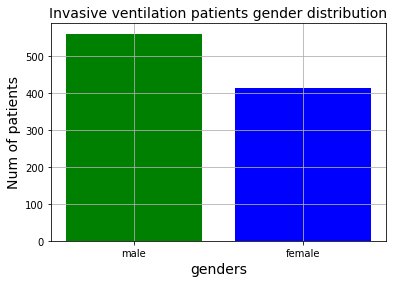

[125, 105]


In [15]:
import matplotlib.pyplot as plt
genders = ['male', 'female']
genders_patient_num = [len(gender_distribution_detail.get('m')), len(gender_distribution_detail.get('f'))]
print(genders_patient_num)
colors = ['green','blue']
plt.bar(genders, genders_patient_num, color = colors)
plt.title("Invasive ventilation patients gender distribution", fontsize=14)
plt.xlabel("genders", fontsize=14)
plt.ylabel('Num of patients', fontsize=14)
plt.grid(True)
plt.show()



genders_mortality = {
    'm': [],
    'f': []
}


for key, val in gender_distribution_detail.items():
#     print(key, val)
    if key == 'm':
        for p in val:
            if patient_mortality_map[p] == 1:
                genders_mortality['m'].append(p)
    if key == 'f':
        for p in val:
            if patient_mortality_map[p] == 1:
                genders_mortality['f'].append(p)
                
# print(genders_mortality)

genders_mortality_num = [len(genders_mortality['m']), len(genders_mortality['f'])]
print(genders_mortality_num)

['american indian/alaska native', 'asian', 'black/african american', 'hispanic/latino', 'other', 'unable to obtain', 'unknown', 'white']


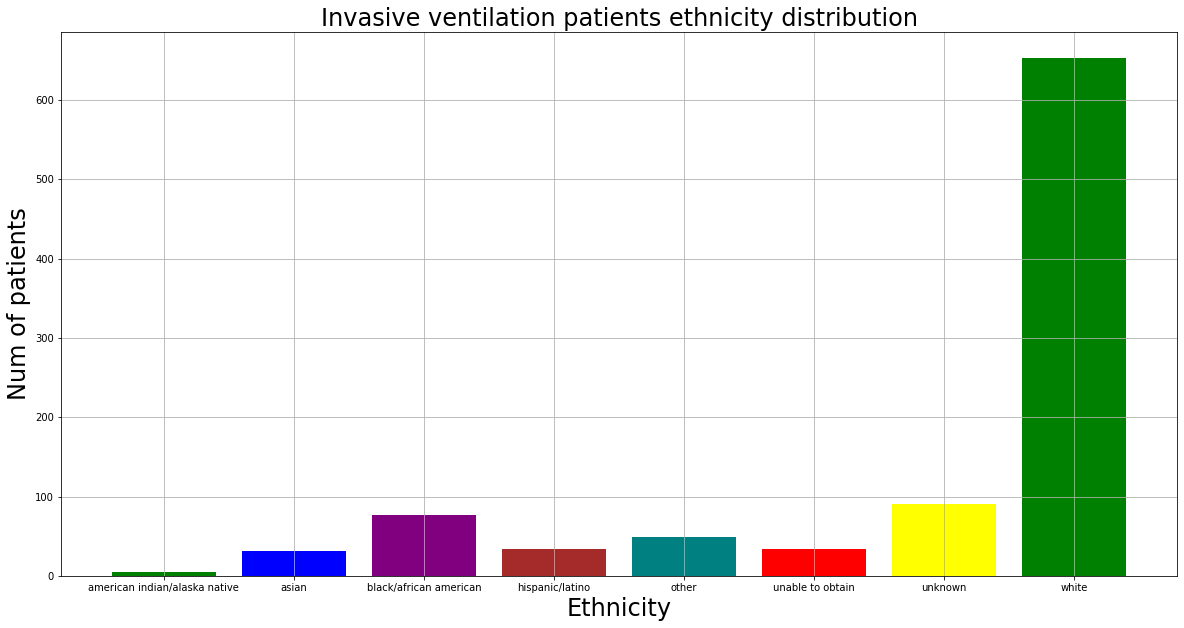

In [16]:
import matplotlib.pyplot as plt
ethnicity = [e for e in ethnicity_distribution_detail.keys()]
ethnicity.sort()
ethnicity_patient_num = [len(ethnicity_distribution_detail.get(e)) for e in ethnicity]
print(ethnicity)
plt.figure(figsize=(20,10))
colors = ['green','blue','purple','brown','teal', 'red', 'yellow']
plt.bar(ethnicity, ethnicity_patient_num, color = colors)
plt.title("Invasive ventilation patients ethnicity distribution", fontsize=24)
plt.xlabel("Ethnicity", fontsize=24)
plt.ylabel('Num of patients', fontsize=24)
plt.grid(True)
plt.show()

['american indian/alaska native', 'asian', 'black/african american', 'hispanic/latino', 'other', 'unable to obtain', 'unknown', 'white']


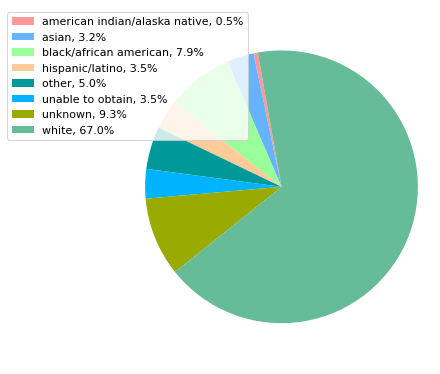

In [17]:
sizes = ethnicity_patient_num
labels = ethnicity

print(labels)

fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3,0,1,1)


theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", ['#ff9999','#66b3ff','#99ff99','#ffcc99', 
                             '#009999','#00b3ff','#99aa00','#66bb99'])

_, _ = ax1.pie(sizes, startangle=100)

ax1.axis('equal')

total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

plt.show()

['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '>100']
['american indian/alaska native', 'asian', 'black/african american', 'hispanic/latino', 'other', 'unable to obtain', 'unknown', 'white']
[0, 9, 32, 47, 102, 185, 221, 218, 138, 22, 0]
{'0-10': [], '11-20': [11347192], '21-30': [15796335, 15580578, 13697731], '31-40': [11230452, 18569207, 11488867, 12125322, 12864426, 18502296], '41-50': [15117765, 13313918, 16260564, 15545849, 13891700, 12633892, 18875034, 11007473, 10630310, 14183192, 14942964, 10819468, 19652570, 14279051, 18484451, 16195081], '51-60': [12668169, 13411545, 14172006, 16237156, 19839346, 17167982, 11101925, 11965661, 15239071, 12300667, 19261055, 14744387, 15998488, 15095611, 10144145, 10567949, 14998916, 11751512, 18454868, 18632695, 16438601, 19846489, 13012861, 12329981, 12750983, 12118241, 13036533, 13500443, 16783434, 11695792], '61-70': [15600053, 14113317, 14434125, 14687655, 16570377, 11648170, 18881985, 13247581,

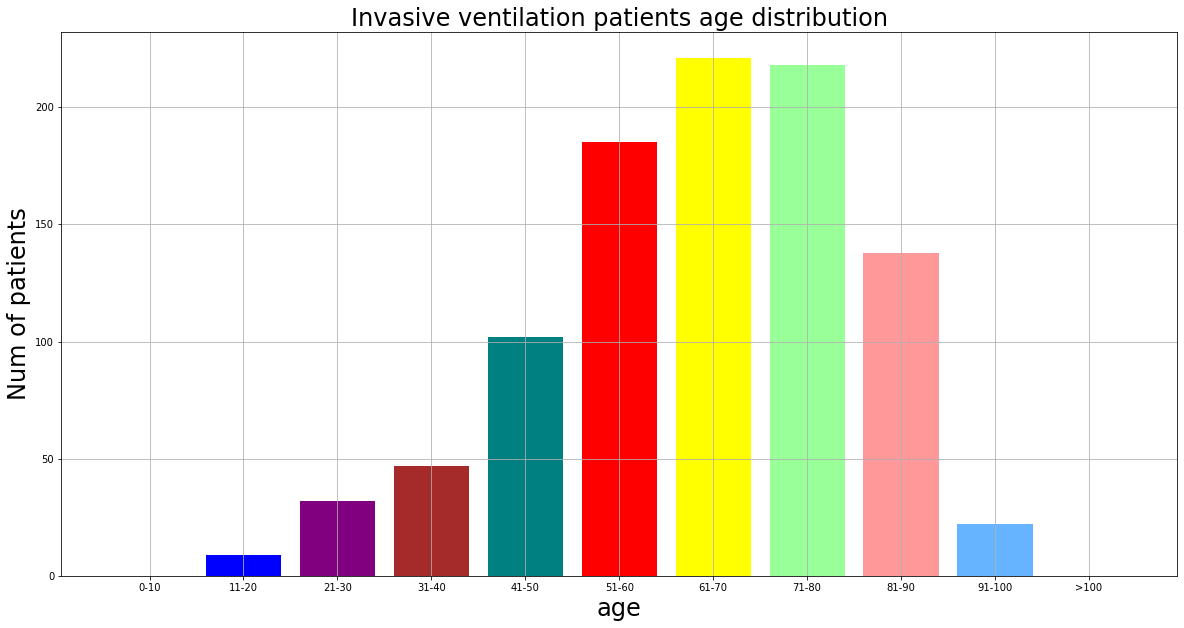

In [18]:
import matplotlib.pyplot as plt
age_ranges = [e for e in age_distribution_detail.keys()]
age_ranges_patients_num = [len(age_distribution_detail.get(e)) for e in age_ranges]
print(age_ranges)
print(ethnicity)

age_ranges_patient_mortality = {}

for l in age_ranges:
    age_ranges_patient_mortality[l] = []
    
for key, val in age_distribution_detail.items():
    for v in val:
        if patient_mortality_map[v] == 1:
            age_ranges_patient_mortality[key].append(v)

print(age_ranges_patients_num)
print(age_ranges_patient_mortality)


age_ranges_patient_mortality_num = [len(age_ranges_patient_mortality.get(e)) for e in age_ranges]
print(age_ranges_patient_mortality_num)

plt.figure(figsize=(20,10))
colors = ['green','blue','purple','brown','teal', 'red', 'yellow', '#99ff99', '#ff9999','#66b3ff']
plt.bar(age_ranges, age_ranges_patients_num, color = colors)
plt.title("Invasive ventilation patients age distribution", fontsize=24)
plt.xlabel("age", fontsize=24)
plt.ylabel('Num of patients', fontsize=24)
plt.grid(True)
plt.show()

In [19]:
live = []
died = []
for k, v in patient_mortality_map.items():
    if v == 0:
        live.append(k)
    else:
        died.append(k)
        
print(len(live),len(died))

744 230


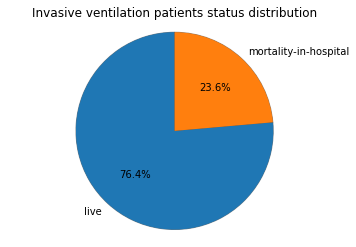

In [20]:
labels = ["live", "mortality-in-hospital"]
values = [744, 230]
fig1, ax1 = plt.subplots()
ax1.pie(values,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, radius=1800)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Invasive ventilation patients status distribution", fontsize=12)

plt.show()

['american indian/alaska native', 'asian', 'black/african american', 'hispanic/latino', 'other', 'unable to obtain', 'unknown', 'white']
[1, 6, 19, 4, 6, 12, 28, 154]
[5, 31, 77, 34, 49, 34, 91, 653]


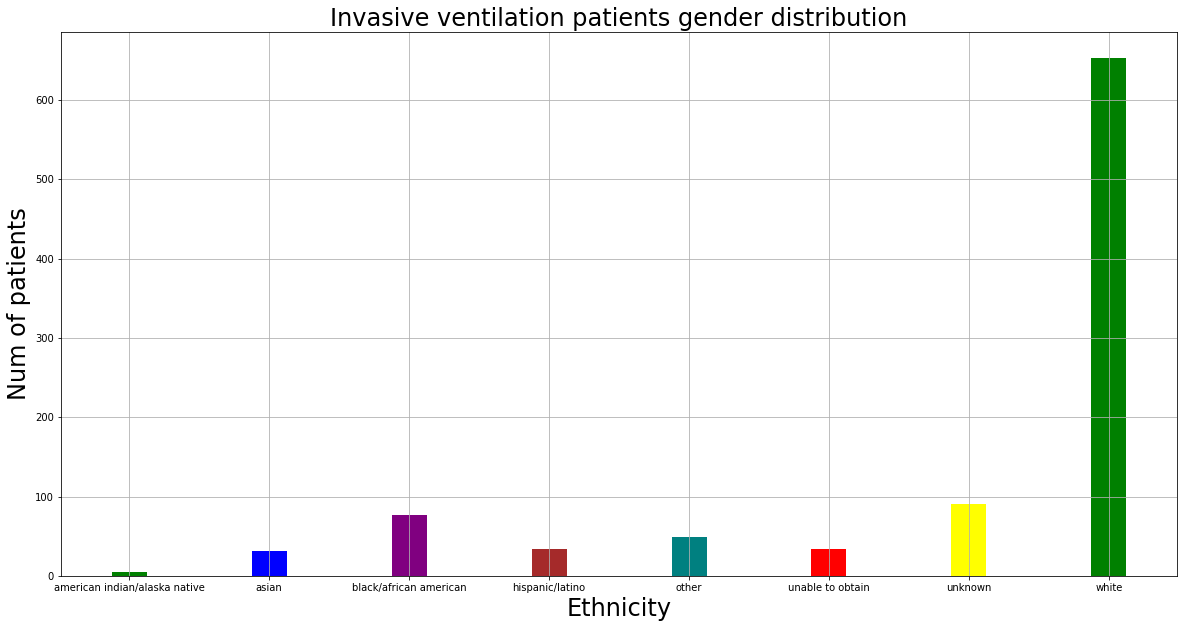

In [21]:
import matplotlib.pyplot as plt
ethnicity = [e for e in ethnicity_distribution_detail.keys()]
ethnicity.sort()
ethnicity_patient_num = [len(ethnicity_distribution_detail.get(e)) for e in ethnicity]

bar_width = 0.25
ethnicity_mortality = {}

for key, val in ethnicity_distribution_detail.items():
#     print(key, val)
    mortality = []
    for v in val:
        if v in patient_mortality_map and patient_mortality_map[v] == 1:
            mortality.append(v)

#     print(mortality)
    ethnicity_mortality[key] = mortality
    
# print(ethnicity_mortality)


ethnicity_mortality_num = [len(ethnicity_mortality.get(e)) for e in ethnicity]



print(ethnicity)
print(ethnicity_mortality_num)
print(ethnicity_patient_num)
plt.figure(figsize=(20,10))
colors = ['green','blue','purple','brown','teal', 'red', 'yellow']
plt.bar(ethnicity, ethnicity_patient_num, width = bar_width, color = colors)
plt.bar(ethnicity, ethnicity_mortality_num, width = bar_width, color = colors)
plt.title("Invasive ventilation patients gender distribution", fontsize=24)
plt.xlabel("Ethnicity", fontsize=24)
plt.ylabel('Num of patients', fontsize=24)
plt.grid(True)
plt.show()

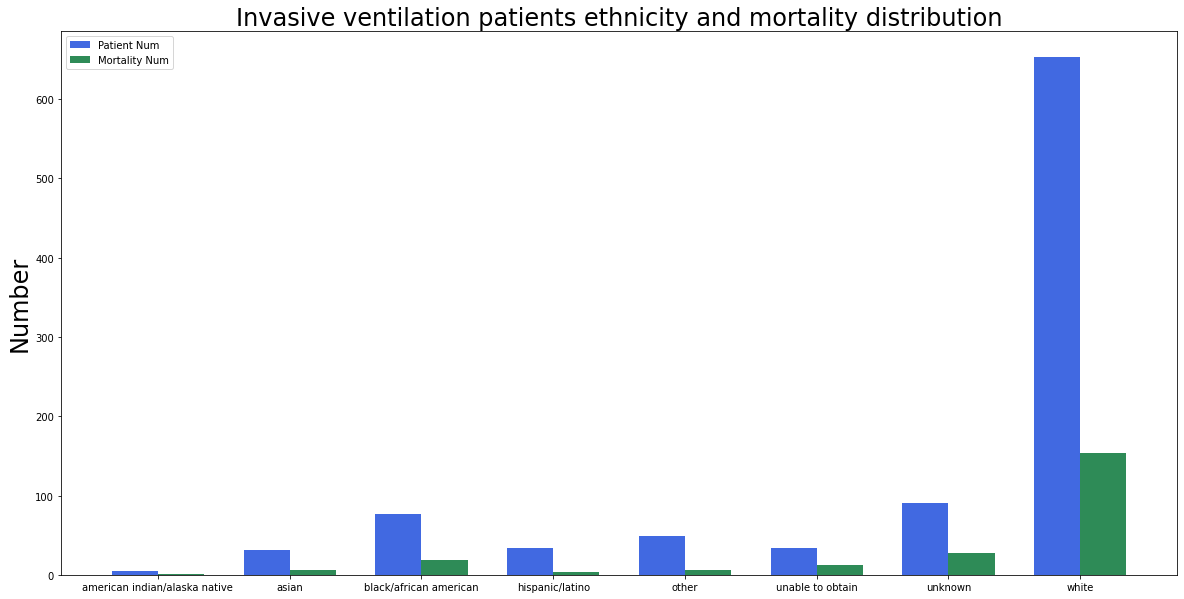

american indian/alaska native -> patient: 5 mortality: 1 mortality rate: 0.2
asian -> patient: 31 mortality: 6 mortality rate: 0.1935483870967742
black/african american -> patient: 77 mortality: 19 mortality rate: 0.24675324675324675
hispanic/latino -> patient: 34 mortality: 4 mortality rate: 0.11764705882352941
other -> patient: 49 mortality: 6 mortality rate: 0.12244897959183673
unable to obtain -> patient: 34 mortality: 12 mortality rate: 0.35294117647058826
unknown -> patient: 91 mortality: 28 mortality rate: 0.3076923076923077
white -> patient: 653 mortality: 154 mortality rate: 0.23583460949464014


In [22]:
import numpy as np
import matplotlib.pyplot as plt

'''
['american indian/alaska native', 'asian', 'black/african american', 'hispanic/latino', 'other', 'unable to obtain', 'unknown', 'white']
[1, 6, 19, 4, 6, 12, 28, 154]
[5, 31, 77, 34, 49, 34, 91, 653]
'''
labels = ['american indian/alaska native', 'asian', 'black/african american', 'hispanic/latino', 'other', 'unable to obtain', 'unknown', 'white']

N = 8
patients = (5, 31, 77, 34, 49, 34, 91, 653)


ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, patients, width, color='royalblue')

mortality =   (1, 6, 19, 4, 6, 12, 28, 154)
rects2 = ax.bar(ind+width, mortality, width, color='seagreen')

# add some
ax.set_ylabel('Number', fontsize=24)
ax.set_title('Invasive ventilation patients ethnicity and mortality distribution', fontsize=24)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(labels)

ax.legend( (rects1[0], rects2[0]), ('Patient Num', 'Mortality Num') )

plt.show()

for i in range(8):
    print(labels[i], '-> patient:', patients[i], 'mortality:', mortality[i], 'mortality rate:', mortality[i]/patients[i])

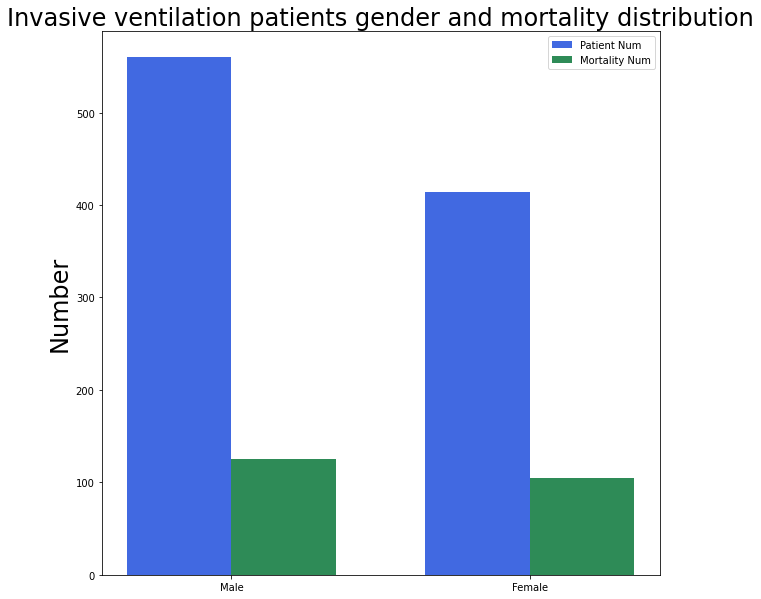

Male -> patient: 560 mortality: 125 mortality rate: 0.22321428571428573
Female -> patient: 414 mortality: 105 mortality rate: 0.2536231884057971


In [23]:
import numpy as np
import matplotlib.pyplot as plt


labels = ['Male', 'Female']

N = 2
patients = [560, 414]


ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, patients, width, color='royalblue')

mortality =  [125, 105]
rects2 = ax.bar(ind+width, mortality, width, color='seagreen')

# add some
ax.set_ylabel('Number', fontsize=24)
ax.set_title('Invasive ventilation patients gender and mortality distribution', fontsize=24)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(labels)

ax.legend( (rects1[0], rects2[0]), ('Patient Num', 'Mortality Num') )

plt.show()

for i in range(2):
    print(labels[i], '-> patient:', patients[i], 'mortality:', mortality[i], 'mortality rate:', mortality[i]/patients[i])

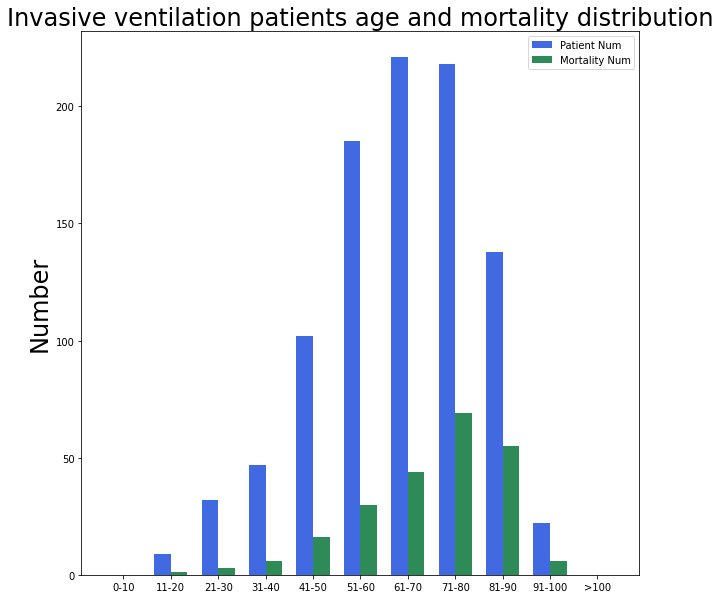

11-20 -> patient: 9 mortality: 1 mortality rate: 0.1111111111111111
21-30 -> patient: 32 mortality: 3 mortality rate: 0.09375
31-40 -> patient: 47 mortality: 6 mortality rate: 0.1276595744680851
41-50 -> patient: 102 mortality: 16 mortality rate: 0.1568627450980392
51-60 -> patient: 185 mortality: 30 mortality rate: 0.16216216216216217
61-70 -> patient: 221 mortality: 44 mortality rate: 0.19909502262443438
71-80 -> patient: 218 mortality: 69 mortality rate: 0.3165137614678899
81-90 -> patient: 138 mortality: 55 mortality rate: 0.39855072463768115
91-100 -> patient: 22 mortality: 6 mortality rate: 0.2727272727272727


In [24]:
# [0, 9, 32, 47, 102, 185, 221, 218, 138, 22, 0]
# [0, 1, 3, 6, 16, 30, 44, 69, 55, 6, 0]



import numpy as np
import matplotlib.pyplot as plt


labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '>100']

N = 11
patients = [0, 9, 32, 47, 102, 185, 221, 218, 138, 22, 0]


ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, patients, width, color='royalblue')

mortality =  [0, 1, 3, 6, 16, 30, 44, 69, 55, 6, 0]
rects2 = ax.bar(ind+width, mortality, width, color='seagreen')

# add some
ax.set_ylabel('Number', fontsize=24)
ax.set_title('Invasive ventilation patients age and mortality distribution', fontsize=24)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(labels)

ax.legend( (rects1[0], rects2[0]), ('Patient Num', 'Mortality Num') )

plt.show()

for i in range(N):
    if patients[i] != 0:
        print(labels[i], '-> patient:', patients[i], 'mortality:', mortality[i], 'mortality rate:', mortality[i]/patients[i])


['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '>100']


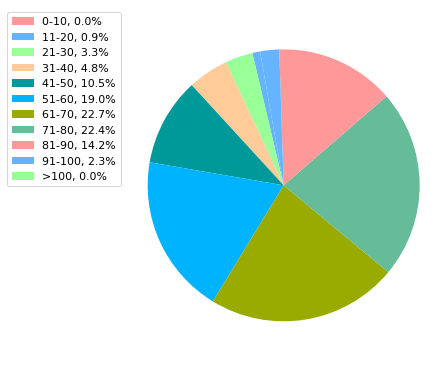

In [25]:
sizes = age_ranges_patients_num
labels = labels

print(labels)

fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3,0,1,1)


theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", ['#ff9999','#66b3ff','#99ff99','#ffcc99', 
                             '#009999','#00b3ff','#99aa00','#66bb99'])

_, _ = ax1.pie(sizes, startangle=100)

ax1.axis('equal')

total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

plt.show()